# Quick Data Info

Data is stored in local directories, by year (going back to 2014), and then by week.

File format is something like 

"./csv's/**##year**/year-**##year**-week-**##week**-DK-player_data.csv"

but replace the bold text with whichever number you need.

So for stats about week 12 in 2018, your file path looks like:

`
file_path = "./csv's/2018/year-2018-week-12-DK-player_data.csv"
df = pd.read_csv(file_path)
df.head()
`

Also, as it stands right now, to update the data, in a command prompt outside of anaconda, you'll need to run:
`pip install -r requirements.txt`
while in the root directory of .txt file.

# Context

Daily Fantasy Sports (DFS) is a subset of sports betting. It requires participants to put together teams that they think will score the most amount of points, but that team has to fit within a salary cap.

The aim of this exploratory data analysis is to see if there are any patterns in high performing lineups that can be found and later modeled.

**Caveat:** This is all retrospective, as I couldn't find projections from the past that didn't cost an arm and a leg. In an ideal situation, we would also have projections to compare actual scores to.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dfs_data_scraper import get_player_data

## Helper Functions

In [2]:
def get_weekly_data(week, year):
    file_path = f"./csv's/{year}/year-{year}-week-{week}-DK-player_data.csv"
    df = pd.read_csv(file_path)
    return df

In [3]:
def print_data(lst_dfs):
    for x in lst_dfs:
        x = x.reset_index(drop=True)[0:15]
        position = x['Pos'][0]
        h_a = x['h/a'][0]
        pt_mn, pt_md, pt_st = get_means_medians_stds(x, 'DK points')
        pt_1k_mn, pt_1k_md, pt_1k_st = get_means_medians_stds(x, 'points/1k')
        print(position, h_a)
        print("points:")
        print(f"mean: {pt_mn}, \n med: {pt_md}, \n std: {pt_st}\n")
        print("points/1k:")
        print(f"mean: {pt_1k_mn}, \n med: {pt_1k_md}, \n std: {pt_1k_st}\n")
        print("=========================================")    

In [4]:
def get_pos_h_a_breakdowns(df):
    # first we want to re-sort the main df by points
    df_sorted_pts = df.sort_values(by='DK points', ascending=False)
    # then create all the data subsets
    qb_home_games, qb_away_games = get_pos_h_a_df(df_sorted_pts, 'QB')
    rb_home_games, rb_away_games = get_pos_h_a_df(df_sorted_pts, 'RB')
    wr_home_games, wr_away_games = get_pos_h_a_df(df_sorted_pts, 'WR')
    te_home_games, te_away_games = get_pos_h_a_df(df_sorted_pts, 'TE')
    def_home_games, def_away_games = get_pos_h_a_df(df_sorted_pts, 'Def')
    dfs = [
        qb_home_games, qb_away_games,
        rb_home_games, rb_away_games,
        wr_home_games, wr_away_games,
        te_home_games, te_away_games,
        def_home_games, def_away_games
    ]
    return dfs

In [5]:
# function for separating performance in home and away
# games based on position
def get_pos_h_a_df(df, pos_str):
    home_filt = df['h/a'] == 'h'
    away_filt = df['h/a'] == 'a'
    pos_filt = df['Pos'] == pos_str
    home_df =  df.loc[home_filt & pos_filt]
    away_df =  df.loc[away_filt & pos_filt]
    return home_df, away_df

In [6]:
def make_plots(lst_dfs, x_vals_str, y_vals_str):
    for _df in lst_dfs:
        _df = _df.reset_index(drop=True)[0:15]
        h_a = _df['h/a'][0]
        position = _df['Pos'][0]
        x = _df.loc[:, x_vals_str]
        y = _df.loc[:, y_vals_str]
        names = _df.loc[:, 'Name']
        oppt = _df.loc[:, 'Oppt']
        plt.subplots(figsize=(10,8))
        plt.scatter(x=x, y=y)
        plt.xlabel(x_vals_str)
        plt.ylabel(y_vals_str)
        plt.title(f'{x_vals_str} vs {y_vals_str}, {position}s and {h_a}')
        try:
            plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        except:
            pass
        for n, o, x, y in zip(names, oppt, x, y):
            plt.annotate(f"{n} vs {o}", (x+20, y+0.5))

In [7]:
def get_means_medians_stds(df, series):
    mean = df[series].mean()
    median = df[series].median()
    std = np.std(df[series])
    return mean, median, std

## Import Data

In [8]:
year = 2018
week = 12
df = get_weekly_data(week, year)
df = df.drop(['Unnamed: 0', 'Week', 'Year'], axis=1)
df.head(50)

,Name,Pos,Team,h/a,Oppt,DK points,DK salary
0,"Cousins, Kirk",QB,min,h,gnb,30.38,5500.0
1,"Watson, Deshaun",QB,hou,h,ten,29.40,6000.0
2,"Luck, Andrew",QB,ind,h,mia,28.62,6400.0
3,"Prescott, Dak",QB,dal,h,was,27.36,5100.0
4,"Allen, Josh",QB,buf,h,jac,26.30,4400.0
5,"Mayfield, Baker",QB,cle,a,cin,25.92,5500.0
6,"Mariota, Marcus",QB,ten,a,hou,25.92,5300.0
7,"Winston, Jameis",QB,tam,h,sfo,25.88,6000.0
8,"Ryan, Matt",QB,atl,a,nor,25.68,6100.0
9,"Roethlisberger, Ben",QB,pit,a,den,25.28,6100.0


In [9]:
df.tail(50)

,Name,Pos,Team,h/a,Oppt,DK points,DK salary
354,"Tomlinson, Eric",TE,nyj,h,nwe,0.0,2500.0
355,"Carrier, Derek",TE,oak,a,bal,0.0,2500.0
356,"Phillips, John",TE,ari,a,lac,0.0,2500.0
357,"Lengel, Matt",TE,cin,h,cle,0.0,2500.0
358,"Green, Virgil",TE,lac,h,ari,0.0,2500.0
359,"Koyack, Ben",TE,jac,a,buf,0.0,2500.0
360,"DeValve, Seth",TE,cle,a,cin,0.0,2600.0
361,"Saubert, Eric",TE,atl,a,nor,0.0,2500.0
362,"Gathers, Rico",TE,dal,h,was,0.0,2500.0
363,"Cross, Alan",TE,tam,h,sfo,0.0,2500.0


In [10]:
# At first glance, everything looks good, but let's confirm.
df.describe()

,DK points,DK salary
count,404.000000,403.000000
mean,7.481485,3780.397022
std,8.686484,1481.641500
min,-4.000000,0.000000
25%,0.000000,3000.000000
50%,3.950000,3200.000000
75%,11.940000,4400.000000
max,52.700000,9100.000000


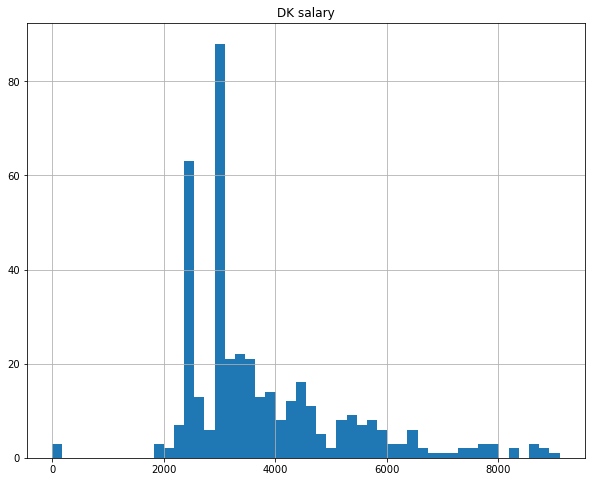

In [11]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df.hist(bins=50, ax=ax, column='DK salary');

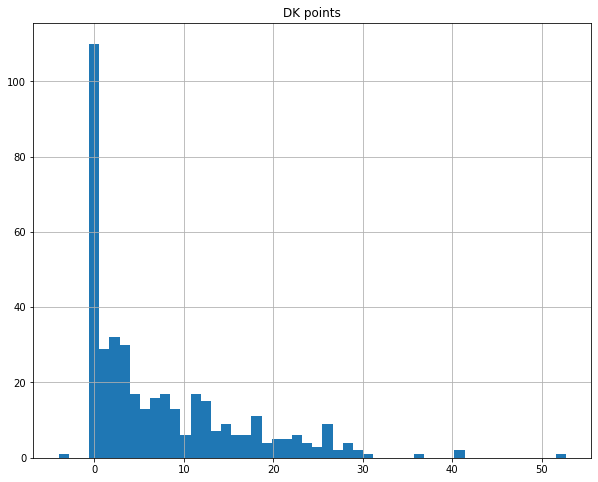

In [12]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df.hist(bins=50, ax=ax, column='DK points');

In [13]:
np.median(df['DK points'])

3.95

The medians and the means are outrageously low, compared to the 75th percentile and the max. I suspect it will make more sense to break this down in a different way. Histograms seems to represent a Poisson distribution.

But first, some more checks: nulls and 0s.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       404 non-null    object 
 1   Pos        404 non-null    object 
 2   Team       404 non-null    object 
 3   h/a        404 non-null    object 
 4   Oppt       404 non-null    object 
 5   DK points  404 non-null    float64
 6   DK salary  403 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.2+ KB


A single null value, in the salary column, which is interesting. Let's see who it is.

In [15]:
filt = df['DK salary'].isnull() == True
df.loc[filt]

,Name,Pos,Team,h/a,Oppt,DK points,DK salary
220,"Jones, T.J.",WR,det,h,chi,2.5,NaN


In [16]:
filt = df['DK salary'] < 100
df.loc[filt]

,Name,Pos,Team,h/a,Oppt,DK points,DK salary
82,"Wilson Jr., Jeff",RB,sfo,a,tam,5.1,0.0
181,"Lewis, Tommylee",WR,nor,h,atl,9.8,0.0
229,"Hatcher, Keon",WR,oak,a,bal,1.8,0.0


Poor TJ, Jeff, Tommylee, and Keon. I guess they did this just for experience.

Let's compensate them for taking one for their respective teams.

In [17]:
# checking metrics per 1k of salary is fairly common,
# so we are going to make these 0s/NaNs into huge values to minimize
# the impact they have on the calculated metrics
df['DK salary'] = df['DK salary'].fillna(0)
df['DK salary'].replace(0, 15000, inplace=True)
print(df.loc[df['DK salary']>9000])

                 Name Pos Team h/a Oppt  DK points  DK salary
37    Barkley, Saquon  RB  nyg   a  phi       36.2     9100.0
82   Wilson Jr., Jeff  RB  sfo   a  tam        5.1    15000.0
181   Lewis, Tommylee  WR  nor   h  atl        9.8    15000.0
220       Jones, T.J.  WR  det   h  chi        2.5    15000.0
229     Hatcher, Keon  WR  oak   a  bal        1.8    15000.0


In [18]:
# make the subsets by position
positions = ['QB', 'RB', 'WR', 'TE', 'Def']
pos_dfs = []

for pos in positions:
    pos_dfs.append(df.loc[df['Pos'] == pos])

In [19]:
# re-check the means and medians, but only check the top 10 at each position
for _df in pos_dfs:
    position = _df.loc[:, 'Pos'].reset_index(drop=True)
    position = position[0]
    points = _df['DK points'].reset_index(drop=True)
    points = points.loc[0:10]
    salaries = _df['DK salary'].reset_index(drop=True)
    salaries = salaries.loc[0:10]
    print(position)
    print(f"Median points: {np.median(points)}")
    print(f"Mean points: {np.mean(points)}")
    print(f"Median salaries: {np.median(salaries)}")
    print(f"Mean salaries: {np.mean(salaries)}")

QB
Median points: 25.92
Mean points: 26.88181818181818
Median salaries: 5600.0
Mean salaries: 5636.363636363636
RB
Median points: 26.6
Mean points: 29.245454545454546
Median salaries: 6300.0
Mean salaries: 6136.363636363636
WR
Median points: 23.5
Mean points: 27.25454545454546
Median salaries: 5700.0
Mean salaries: 6218.181818181818
TE
Median points: 14.5
Mean points: 15.590909090909092
Median salaries: 3200.0
Mean salaries: 3672.7272727272725
Def
Median points: 9.0
Mean points: 10.909090909090908
Median salaries: 2900.0
Mean salaries: 2854.5454545454545


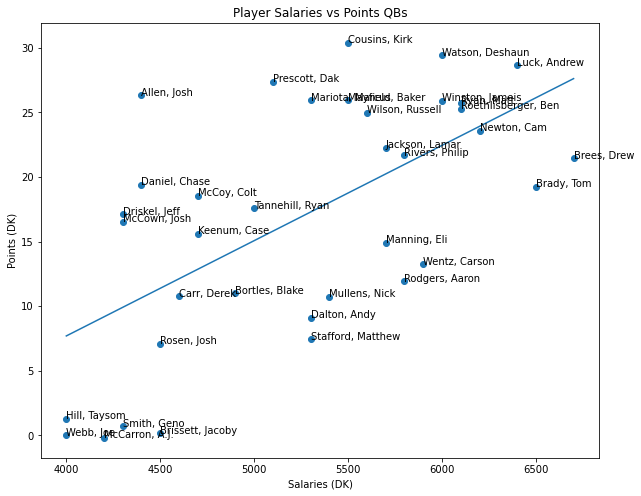

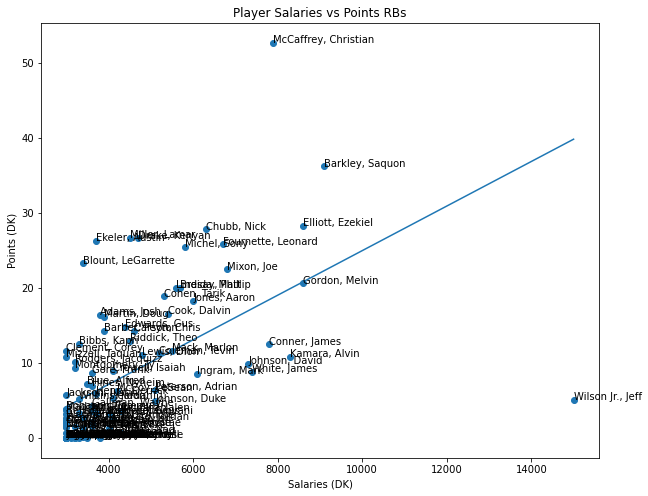

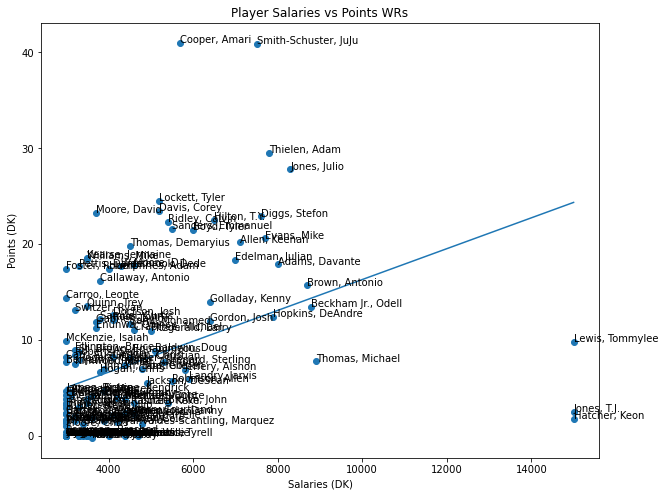

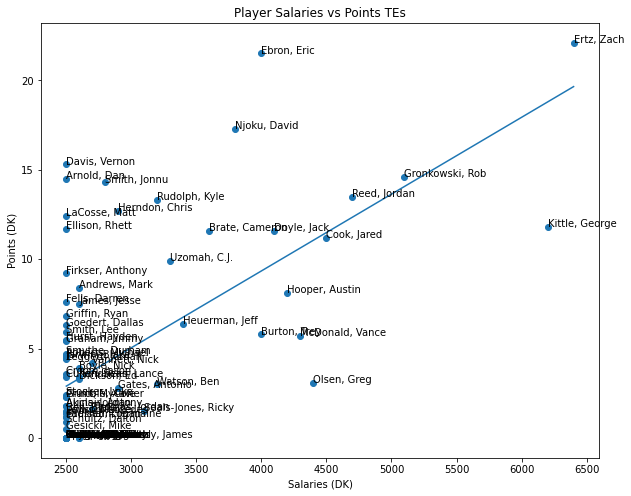

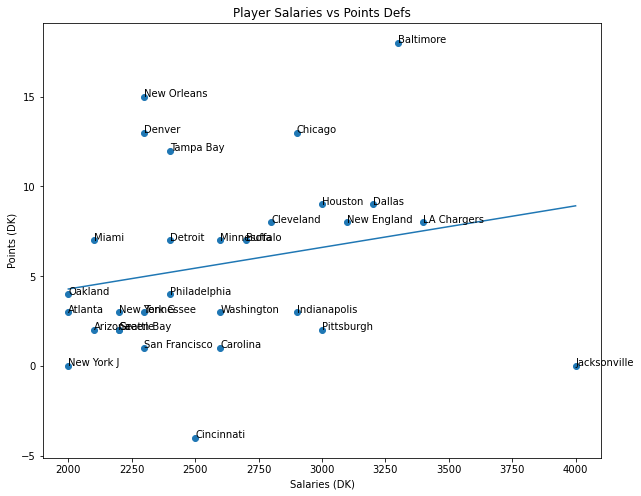

In [20]:
# scatterplots: salaries against points, with index labels, for all players
for _df in pos_dfs:
    x = _df.loc[:, 'DK salary']
    y = _df.loc[:, 'DK points']
    names = _df.loc[:, 'Name']
    position = _df.loc[:, 'Pos'].reset_index(drop=True)
    position = position[0]
    plt.subplots(figsize=(10,8))
    plt.scatter(x=x, y=y)
    plt.xlabel('Salaries (DK)')
    plt.ylabel('Points (DK)')
    plt.title(f'Player Salaries vs Points {position}s')
    try:
        plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    except:
        pass
    for n, x, y in zip(names, x, y):
        plt.annotate(n, (x, y))

That's a lot of data points, even when dividing by position. 

Since we are interested in top performers, let's take the top 15 scorers from each position.

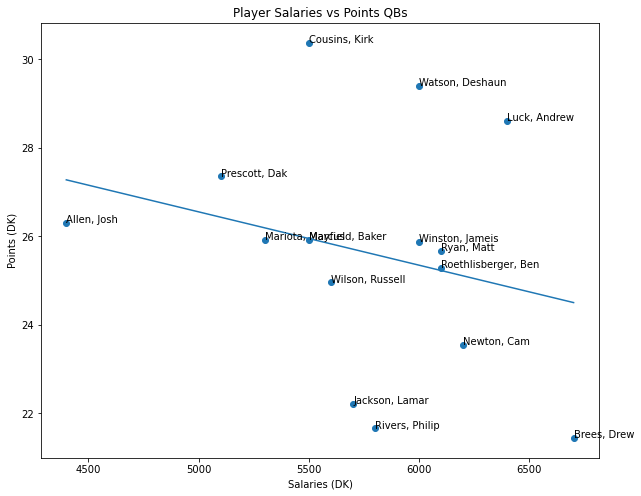

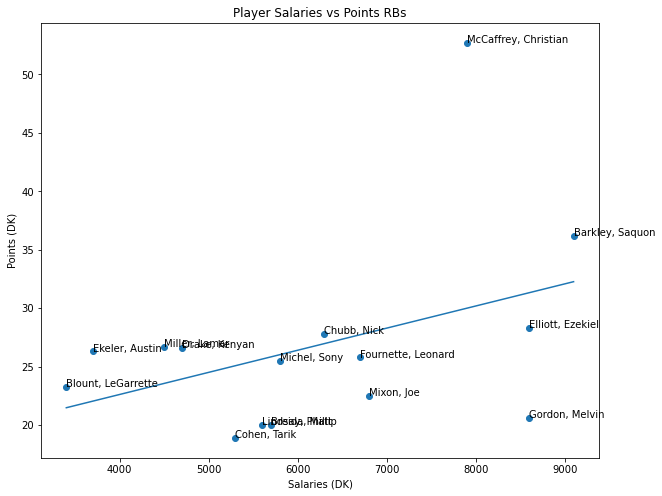

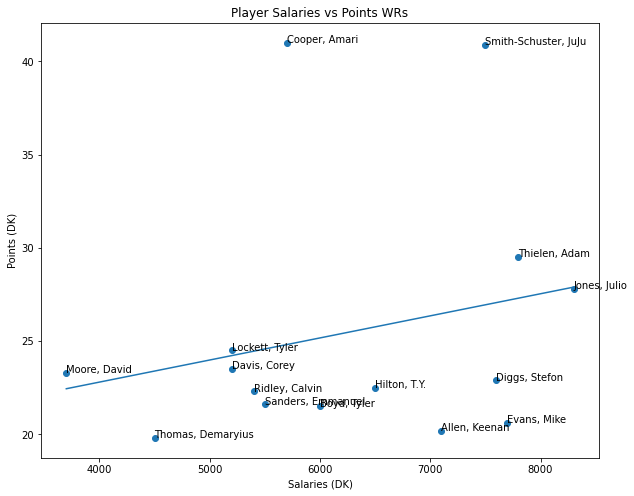

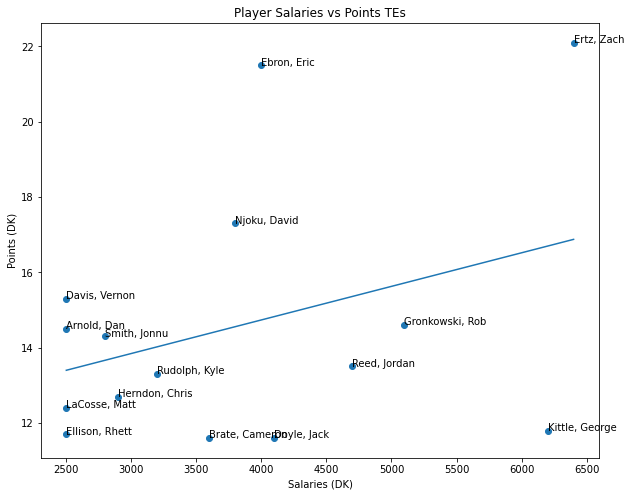

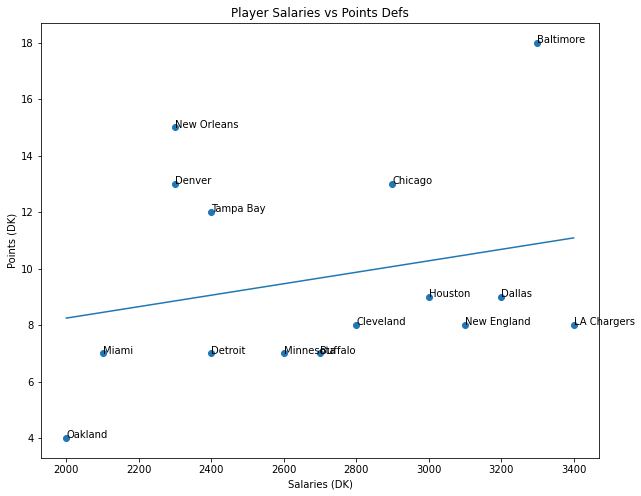

In [21]:
# scatterplots: salaries against points, with index labels, but for top 15 scorers
for _df in pos_dfs:
    x = _df.loc[:, 'DK salary']
    y = _df.loc[:, 'DK points']
    x_top15 = x[0:15]
    y_top15 = y[0:15]
    names = _df.loc[:, 'Name']
    position = _df.loc[:, 'Pos'].reset_index(drop=True)
    position = position[0]
    plt.subplots(figsize=(10,8))
    plt.scatter(x=x_top15, y=y_top15)
    plt.xlabel('Salaries (DK)')
    plt.ylabel('Points (DK)')
    plt.title(f'Player Salaries vs Points {position}s')
    try:
        plt.plot(np.unique(x_top15), np.poly1d(np.polyfit(x_top15, y_top15, 1))(np.unique(x_top15)))
    except:
        pass
    for n, x, y in zip(names[0:15], x[0:15], y[0:15]):
        plt.annotate(n, (x, y))

Granted that the relationship is clearly not linear...

This one is pretty interesting. Taken as a whole, the data goes with what people might expect: as salaries increase, typically points scored do as well.
    
What's surprising... is that when you just look at the top performers, you start to see a different picture. The relationship starts to level out, and in the case of the QBs, even reverses!

Which means there is probably a (some) better metric(s)...

Let's create some.

- Points / 1k salary
- Points @ home vs Points away
- QBs: Points / Pass Attempt
- WRs / TEs / RBs: Points / Target and Points / Reception
- RBs: Points / Carry
- Def: Points allowed to RBs & WRs/QBs

and the probably what might be the most important indicator...

- previous week's performance as an indicator for this week's performance

The first two, we can do right away, but the rest will need some more data.

In [22]:
# points per 1k salary
df['points/1k'] = np.array(df['DK points']) / np.array(df['DK salary']) * 1000
df.head()

,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k
0,"Cousins, Kirk",QB,min,h,gnb,30.38,5500.0,5.523636
1,"Watson, Deshaun",QB,hou,h,ten,29.40,6000.0,4.900000
2,"Luck, Andrew",QB,ind,h,mia,28.62,6400.0,4.471875
3,"Prescott, Dak",QB,dal,h,was,27.36,5100.0,5.364706
4,"Allen, Josh",QB,buf,h,jac,26.30,4400.0,5.977273


In [23]:
# points @ home vs points away
home_filt = df['h/a'] == 'h'
away_filt = df['h/a'] == 'a'
df_home_games = df.loc[home_filt].sort_values(by='points/1k', ascending=False)
df_away_games = df.loc[away_filt].sort_values(by='points/1k', ascending=False)
df_home_games.head(10)

,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k
139,"Cooper, Amari",WR,dal,h,was,41.0,5700.0,7.192982
42,"Ekeler, Austin",RB,lac,h,ari,26.3,3700.0,7.108108
45,"Blount, LeGarrette",RB,det,h,chi,23.3,3400.0,6.852941
36,"McCaffrey, Christian",RB,car,h,sea,52.7,7900.0,6.670886
375,New Orleans,Def,nor,h,atl,15.0,2300.0,6.521739
4,"Allen, Josh",QB,buf,h,jac,26.3,4400.0,5.977273
40,"Miller, Lamar",RB,hou,h,ten,26.7,4500.0,5.933333
162,"Foster, Robert",WR,buf,h,jac,17.4,3000.0,5.800000
290,"Arnold, Dan",TE,nor,h,atl,14.5,2500.0,5.800000
376,Denver,Def,den,h,pit,13.0,2300.0,5.652174


In [24]:
df_away_games.head(10)

,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k
145,"Moore, David",WR,sea,a,car,23.30,3700.0,6.297297
288,"Davis, Vernon",TE,was,a,dal,15.30,2500.0,6.120000
41,"Drake, Kenyan",RB,mia,a,ind,26.60,4700.0,5.659574
140,"Smith-Schuster, JuJu",WR,pit,a,den,40.90,7500.0,5.453333
160,"Pettis, Dante",WR,sfo,a,tam,17.70,3300.0,5.363636
291,"Smith, Jonnu",TE,ten,a,hou,14.30,2800.0,5.107143
6,"Mariota, Marcus",QB,ten,a,hou,25.92,5300.0,4.890566
165,"Carroo, Leonte",WR,mia,a,ind,14.40,3000.0,4.800000
5,"Mayfield, Baker",QB,cle,a,cin,25.92,5500.0,4.712727
143,"Lockett, Tyler",WR,sea,a,car,24.50,5200.0,4.711538


At first glance, it seems that home games perform *slightly* better, but maybe there's more to the picture.

In [25]:
home_game_mean = df_home_games.mean()
away_game_mean = df_away_games.mean()
print(f"home game means: \n{home_game_mean}")
print(f"away game means: \n{away_game_mean}")

home_game_median = df_home_games.median()
away_game_median = df_away_games.median()
print(f"home game medians: \n{home_game_median}")
print(f"away game medians: \n{away_game_median}")

home_game_pp1k_std = np.std(df_home_games['points/1k'])
away_game_pp1k_std = np.std(df_away_games['points/1k'])
print(f"home game std: \n{home_game_pp1k_std}")
print(f"away game std: \n{away_game_pp1k_std}")

home game means: 
DK points       7.960394
DK salary    3917.733990
points/1k       1.841503
dtype: float64
away game means: 
DK points       6.997811
DK salary    3921.393035
points/1k       1.580544
dtype: float64
home game medians: 
DK points       4.400000
DK salary    3200.000000
points/1k       1.354839
dtype: float64
away game medians: 
DK points       3.800000
DK salary    3200.000000
points/1k       1.153846
dtype: float64
home game std: 
1.8634531662047393
away game std: 
1.615921043562667


Looking at the data as a whole, it seems that with away games, even though they score lower, they are more consistent.

In [26]:
# repeating for the top scorers
top_home_game_df = df_home_games.reset_index(drop=True).loc[0:15]
top_away_game_df = df_away_games.reset_index(drop=True).loc[0:15]
top_home_game_mean = top_home_game_df.mean()
top_away_game_mean = top_away_game_df.mean()
print(f"home game means: \n{top_home_game_mean}")
print(f"away game means: \n{top_away_game_mean}")

top_home_game_median = top_home_game_df.median()
top_away_game_median = top_away_game_df.median()
print(f"home game medians: \n{top_home_game_median}")
print(f"away game medians: \n{top_away_game_median}")

top_home_game_pp1k_std = np.std(top_home_game_df['points/1k'])
top_away_game_pp1k_std = np.std(top_away_game_df['points/1k'])
print(f"home game std: \n{top_home_game_pp1k_std}")
print(f"away game std: \n{top_away_game_pp1k_std}")

home game means: 
DK points      24.408750
DK salary    4037.500000
points/1k       5.989208
dtype: float64
away game means: 
DK points      21.693750
DK salary    4362.500000
points/1k       5.013767
dtype: float64
home game medians: 
DK points      22.4
DK salary    3600.0
points/1k       5.8
dtype: float64
away game medians: 
DK points      23.400000
DK salary    4250.000000
points/1k       4.756364
dtype: float64
home game std: 
0.6424598422731275
away game std: 
0.5797172215016946


In regards to top scoring players, the trend in the medians is slightly different as far as points scored. But the rest of the trends seem to hold. The std deviation also gets much closer together between high scorers vs the data as a whole, which seems to indicate that if we can reliably predict who the top 15 are, we will be able to consistenly put together both high scoring lineups, and high floor lineups.

There should probably be at least one more layer here though, where we look at this on a per position basis.

After that, the final correlation will be how does all of this measure up to last week's performance, in order to predict this week's performance. **Note:** We may have to look back 2 weeks to account for bye weeks.

In [27]:
# examine top 15 players at each position and 
# see if there is a difference between home and away

dfs = get_pos_h_a_breakdowns(df)

In [28]:
print_data(dfs)

QB h
points:
mean: 21.89066666666667, 
 med: 22.22, 
 std: 6.174886197781749

points/1k:
mean: 4.0186349488306625, 
 med: 3.8982456140350874, 
 std: 1.1186369574312118

QB a
points:
mean: 17.922666666666668, 
 med: 18.52, 
 std: 6.375025716723729

points/1k:
mean: 3.3363524135835365, 
 med: 3.512, 
 std: 1.0937239549680333

RB h
points:
mean: 21.24666666666667, 
 med: 20.0, 
 std: 9.970347146525151

points/1k:
mean: 4.161092023269161, 
 med: 3.571428571428571, 
 std: 1.5983780940532462

RB a
points:
mean: 19.193333333333335, 
 med: 18.3, 
 std: 7.4051753674185345

points/1k:
mean: 3.546084477807779, 
 med: 3.6000000000000005, 
 std: 0.976053690839979

WR h
points:
mean: 21.55333333333333, 
 med: 20.2, 
 std: 6.183512126795114

points/1k:
mean: 4.112519764688279, 
 med: 3.869565217391304, 
 std: 1.2855383145881254

WR a
points:
mean: 20.493333333333332, 
 med: 17.9, 
 std: 6.8689122541750045

points/1k:
mean: 3.9395983156038428, 
 med: 4.12962962962963, 
 std: 1.3424867929668276

TE h
p

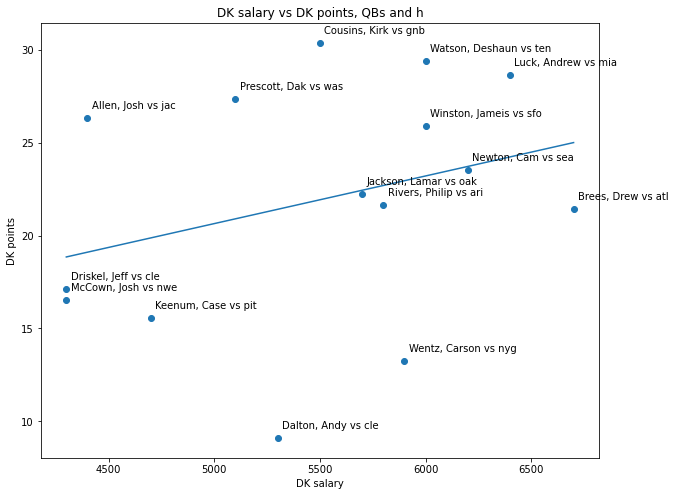

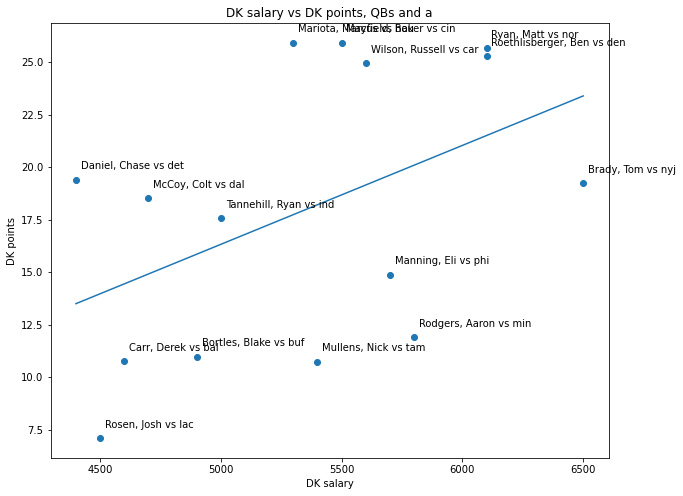

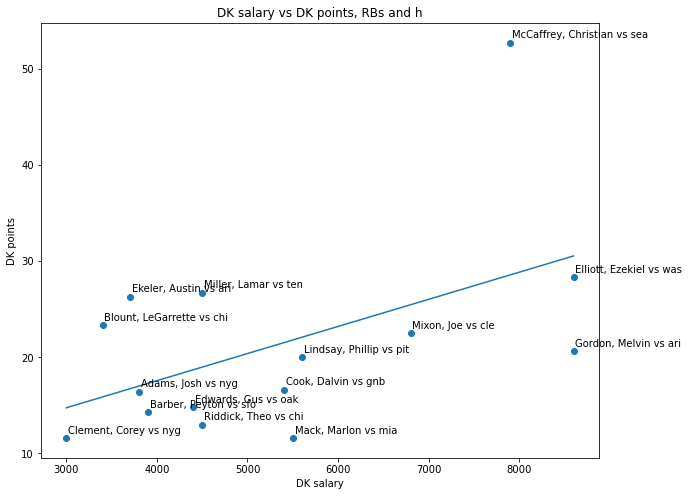

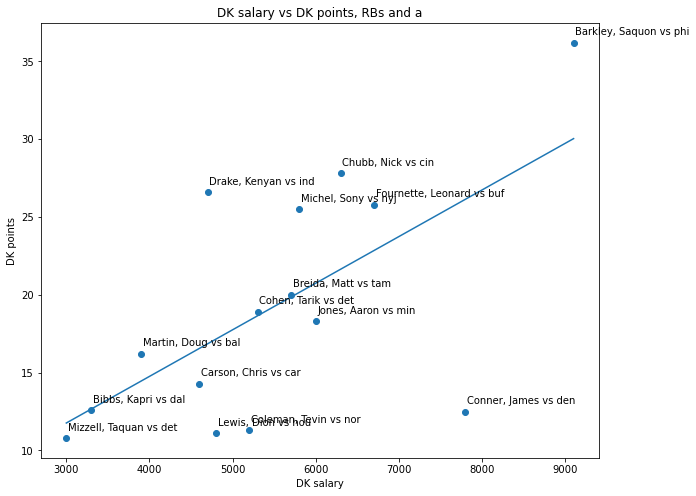

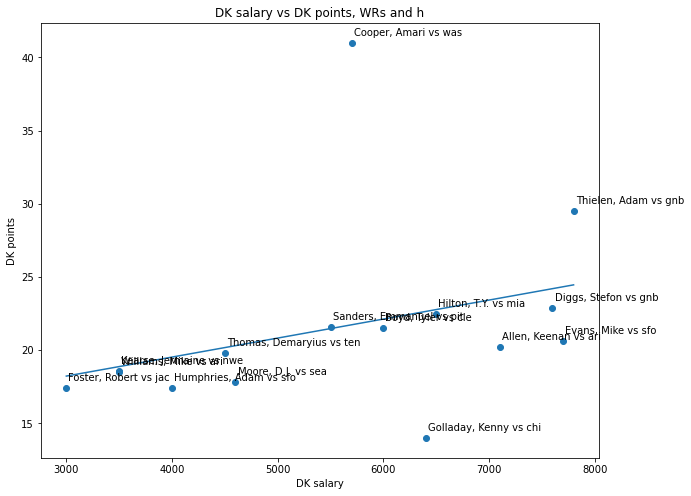

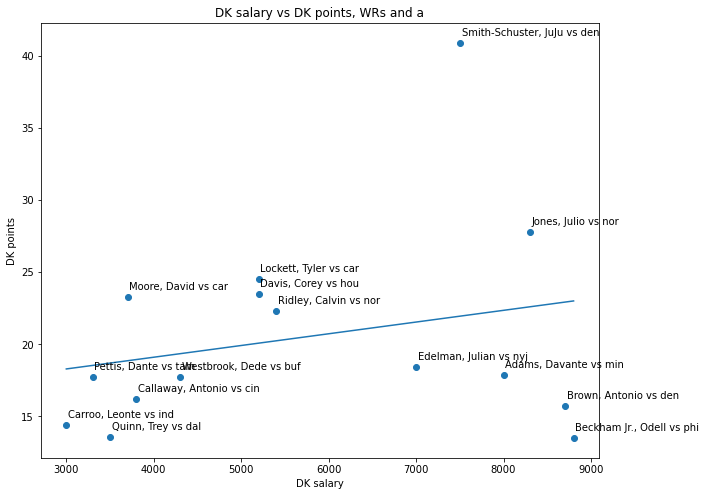

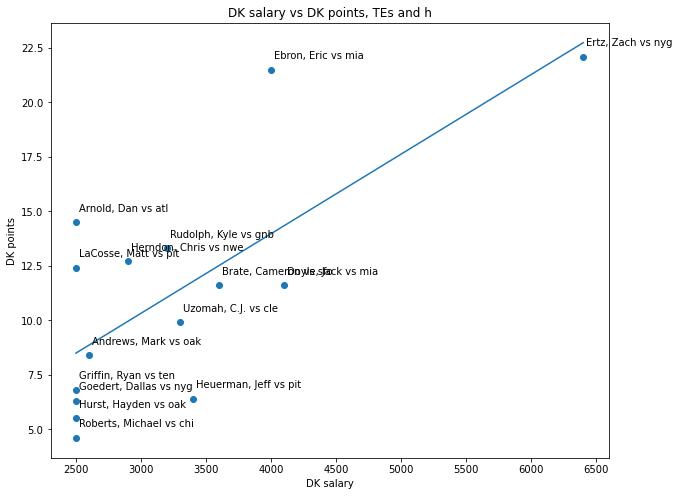

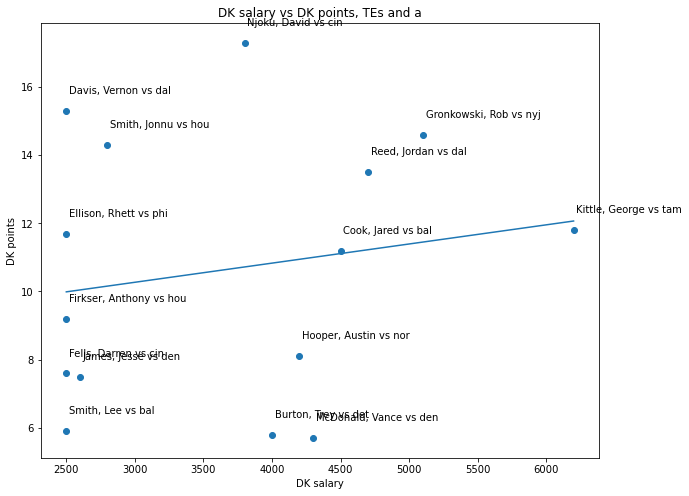

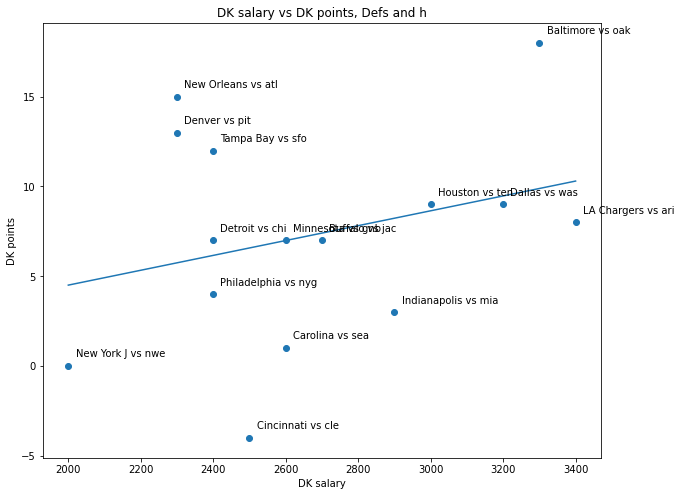

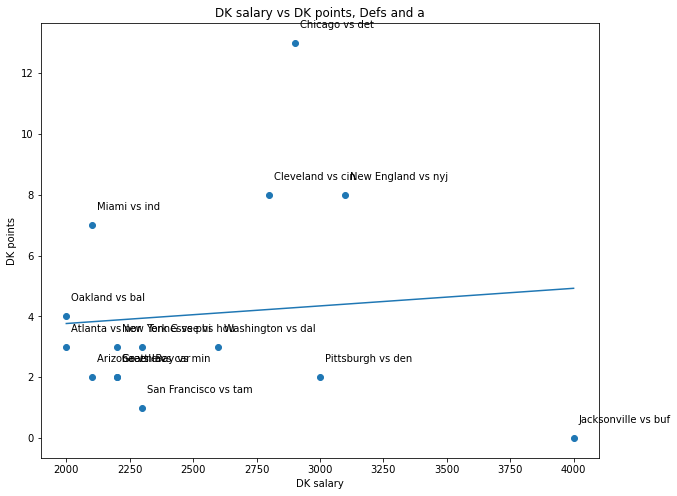

In [29]:
make_plots(dfs, 'DK salary', 'DK points')

In [30]:
# grab performance from last week and the week
# before that one to see if performance has any
# correlations
year = 2018
week = 11
file_path = f"./csv's/{year}/year-{year}-week-{week}-DK-player_data.csv"
df11 = pd.read_csv(file_path)
df11 = df11.drop(['Unnamed: 0', 'Week', 'Year'], axis=1)
week = 10
file_path = f"./csv's/{year}/year-{year}-week-{week}-DK-player_data.csv"
df10 = pd.read_csv(file_path)
df10 = df10.drop(['Unnamed: 0', 'Week', 'Year'], axis=1)

In [31]:
# handle nulls / 0 salaries and create pts per 1k
df11['DK salary'] = df11['DK salary'].fillna(0)
df11['DK salary'].replace(0, 15000, inplace=True)
df10['DK salary'] = df10['DK salary'].fillna(0)
df10['DK salary'].replace(0, 15000, inplace=True)
df11['points/1k'] = np.array(df11['DK points']) / np.array(df11['DK salary']) * 1000
df10['points/1k'] = np.array(df10['DK points']) / np.array(df10['DK salary']) * 1000

In [32]:
df10.head()

,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k
0,"Trubisky, Mitchell",QB,chi,h,det,39.00,5600.0,6.964286
1,"Roethlisberger, Ben",QB,pit,h,car,38.82,6300.0,6.161905
2,"Brees, Drew",QB,nor,a,cin,28.90,6300.0,4.587302
3,"Wilson, Russell",QB,sea,a,lar,27.24,5700.0,4.778947
4,"Wentz, Carson",QB,phi,h,dal,25.10,5700.0,4.403509


In [33]:
df11.head()

,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k
0,"Mahomes II, Patrick",QB,kan,a,lar,43.92,7100.0,6.185915
1,"Goff, Jared",QB,lar,h,kan,40.12,6400.0,6.268750
2,"Brees, Drew",QB,nor,h,phi,33.52,6500.0,5.156923
3,"Newton, Cam",QB,car,a,det,28.48,6200.0,4.593548
4,"Roethlisberger, Ben",QB,pit,a,jac,26.66,5800.0,4.596552


In [34]:
dfs10 = get_pos_h_a_breakdowns(df10)
dfs11 = get_pos_h_a_breakdowns(df11)

In [35]:
print_data(dfs10)

QB h
points:
mean: 19.800000000000004, 
 med: 20.06, 
 std: 9.742903058123899

points/1k:
mean: 3.5075783059028893, 
 med: 3.345762711864406, 
 std: 1.6108050811476835

QB a
points:
mean: 17.11733333333333, 
 med: 17.08, 
 std: 7.333898887282867

points/1k:
mean: 3.234376006099283, 
 med: 3.572, 
 std: 1.3143047328134627

RB h
points:
mean: 19.026666666666664, 
 med: 14.6, 
 std: 9.244563567608562

points/1k:
mean: 3.7999467599219066, 
 med: 2.9818181818181815, 
 std: 1.9582885405971209

RB a
points:
mean: 24.30666666666667, 
 med: 26.2, 
 std: 9.135897450290377

points/1k:
mean: 4.280266613625607, 
 med: 4.428571428571429, 
 std: 1.4360851206337815

WR h
points:
mean: 20.70666666666666, 
 med: 20.3, 
 std: 8.31091384198446

points/1k:
mean: 3.8291914338090622, 
 med: 3.051282051282051, 
 std: 1.715113297109691

WR a
points:
mean: 18.749333333333333, 
 med: 18.8, 
 std: 4.874881833325696

points/1k:
mean: 3.270820960199652, 
 med: 3.216867469879518, 
 std: 1.2667495803341502

TE h
poin

In [36]:
print_data(dfs11)

QB h
points:
mean: 17.339999999999996, 
 med: 16.9, 
 std: 10.038528444614446

points/1k:
mean: 3.073201337134655, 
 med: 3.206896551724138, 
 std: 1.5283418799596569

QB a
points:
mean: 16.998666666666665, 
 med: 15.68, 
 std: 10.319218230509948

points/1k:
mean: 2.9755658726049488, 
 med: 2.957142857142857, 
 std: 1.5039554451087314

RB h
points:
mean: 18.046666666666667, 
 med: 17.7, 
 std: 7.259647986568558

points/1k:
mean: 3.1851559183295852, 
 med: 2.8125, 
 std: 1.4862567085057892

RB a
points:
mean: 16.293333333333333, 
 med: 14.2, 
 std: 8.505877706360206

points/1k:
mean: 3.066217582404973, 
 med: 2.631578947368421, 
 std: 1.5195834970389563

WR h
points:
mean: 21.893333333333327, 
 med: 19.2, 
 std: 7.284272250693424

points/1k:
mean: 3.9569114142744635, 
 med: 3.5641025641025643, 
 std: 1.6732050849440074

WR a
points:
mean: 23.34, 
 med: 21.4, 
 std: 9.85933060608072

points/1k:
mean: 4.161983522327275, 
 med: 3.947368421052632, 
 std: 1.8914297488641594

TE h
points:
mea

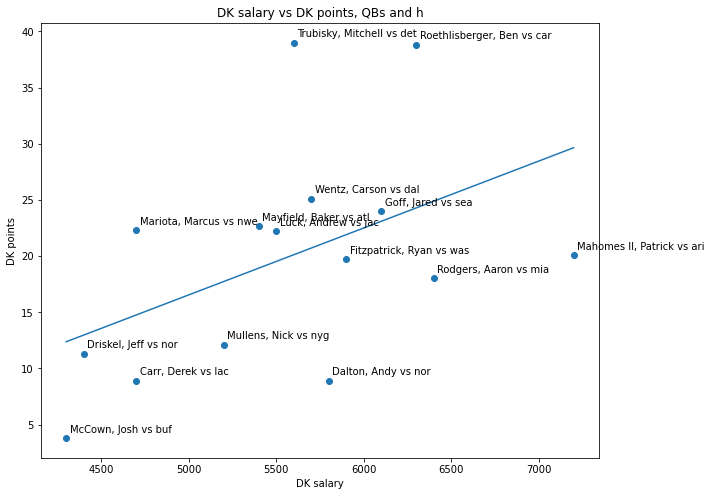

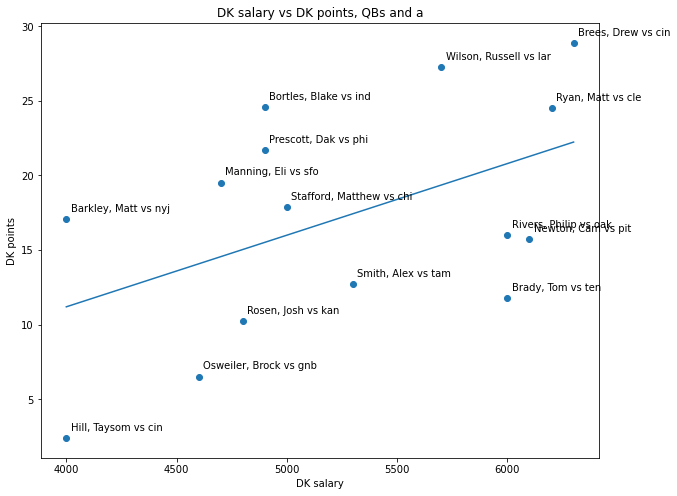

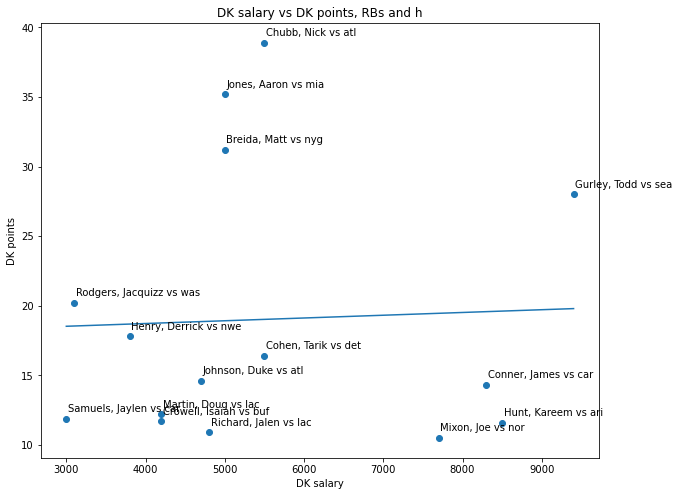

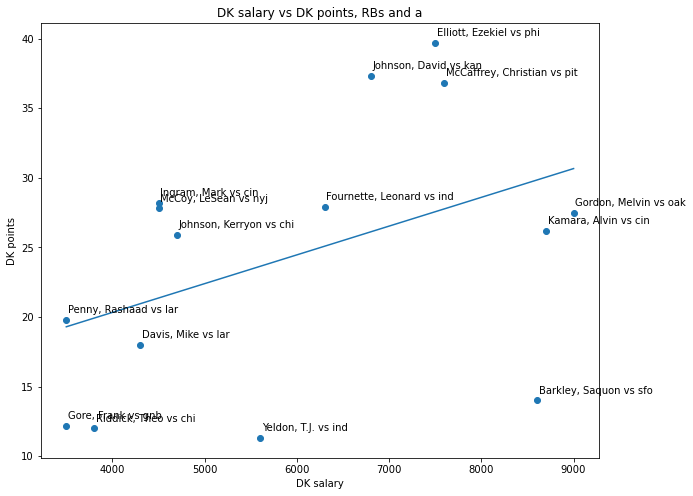

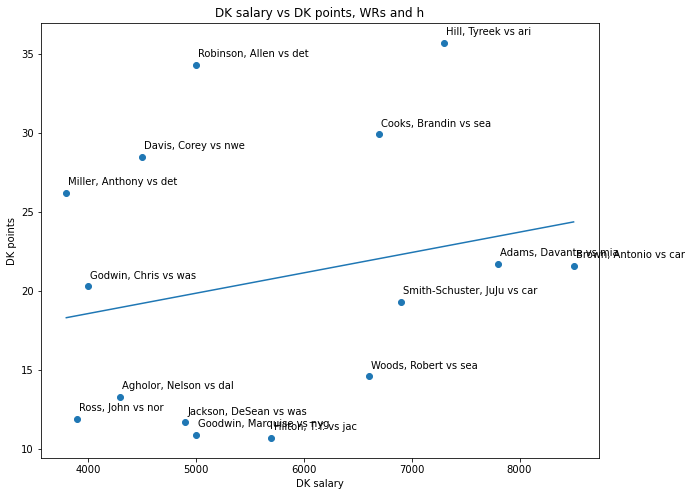

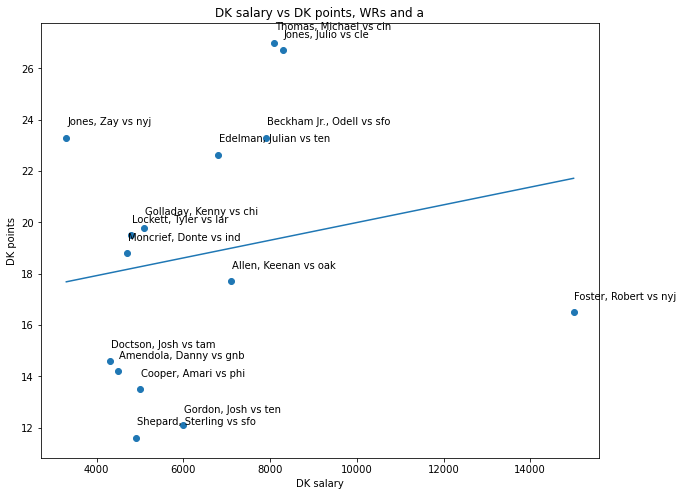

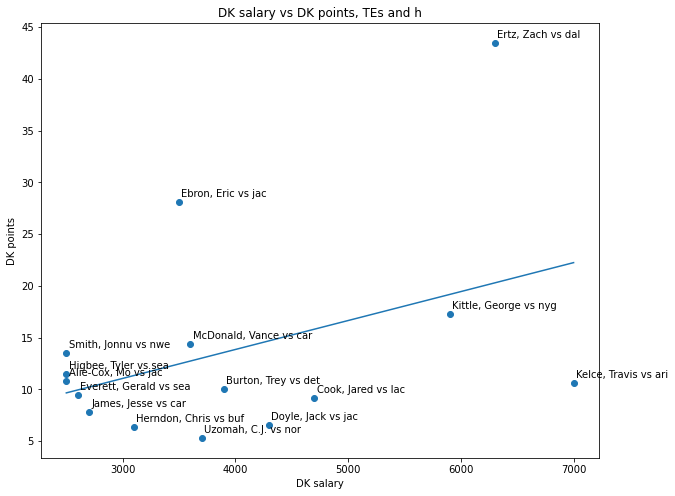

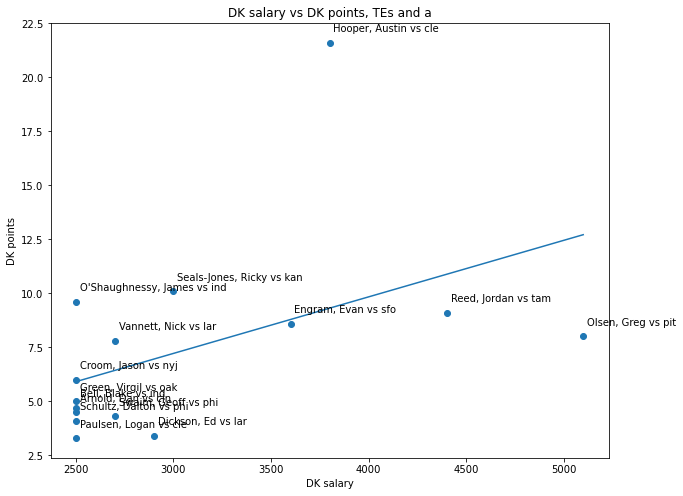

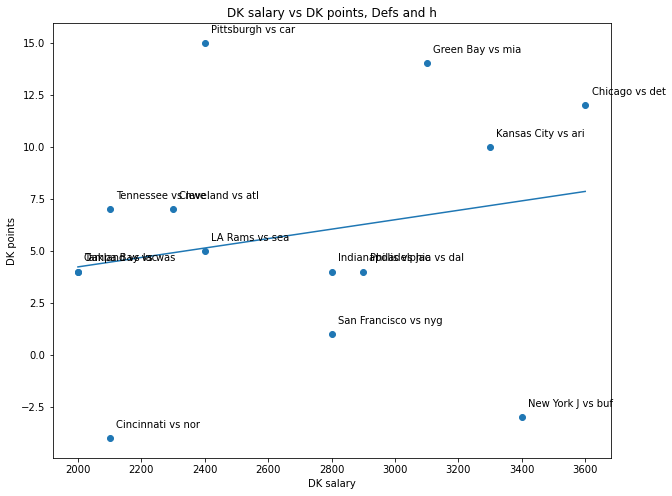

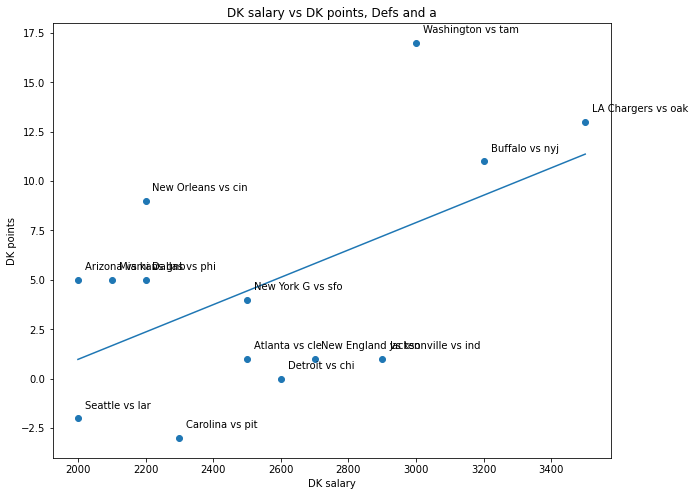

In [37]:
make_plots(dfs10, 'DK salary', 'DK points')

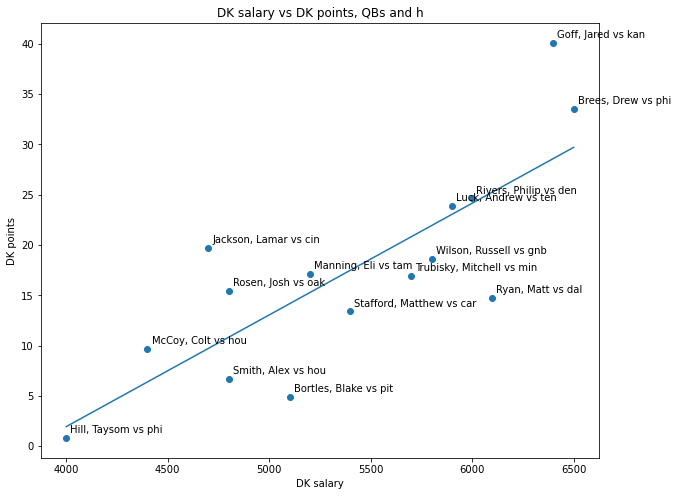

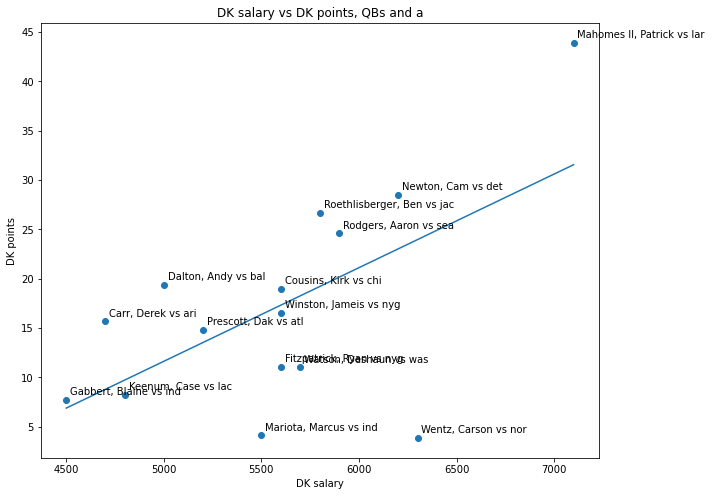

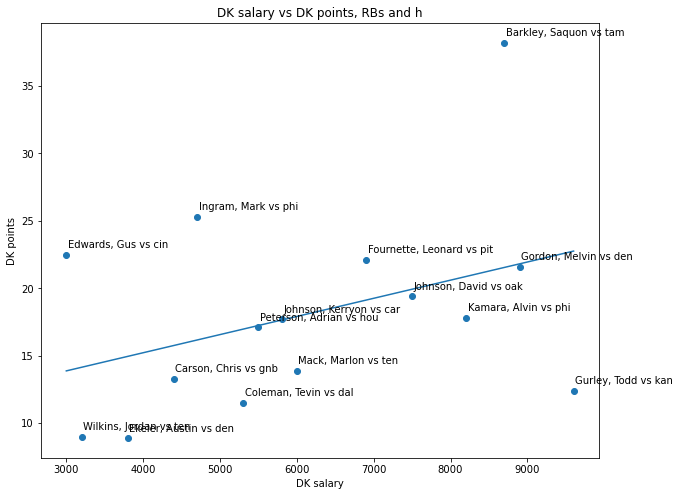

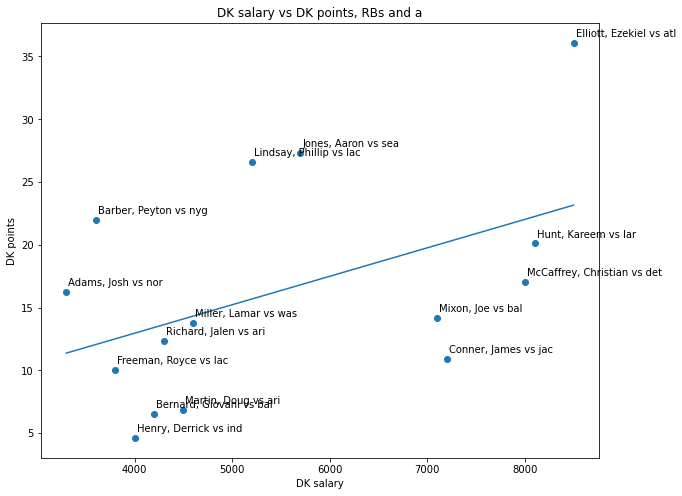

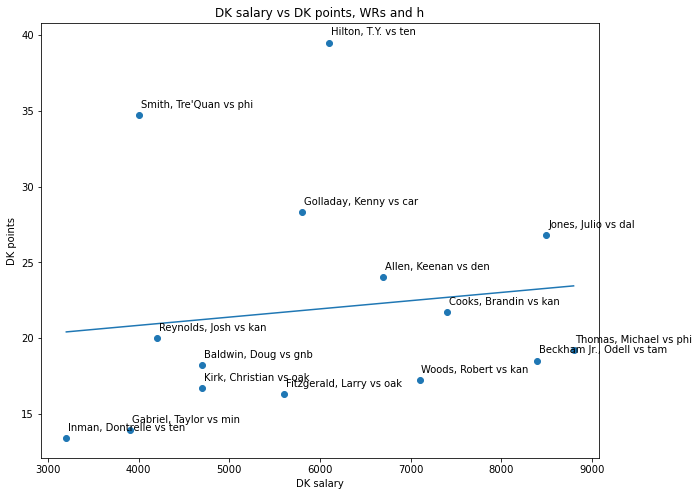

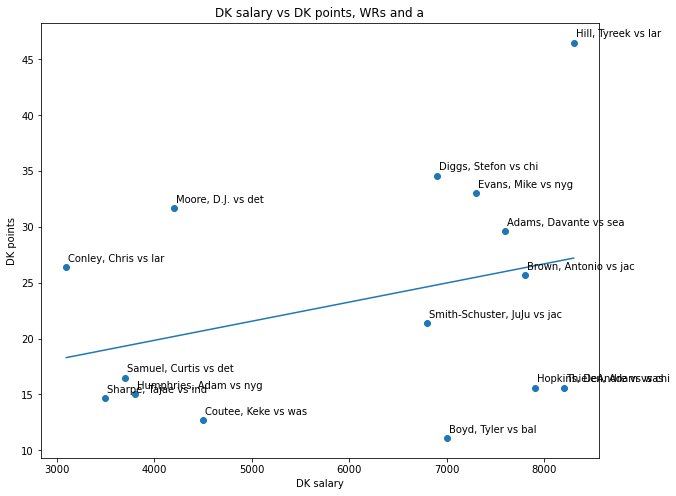

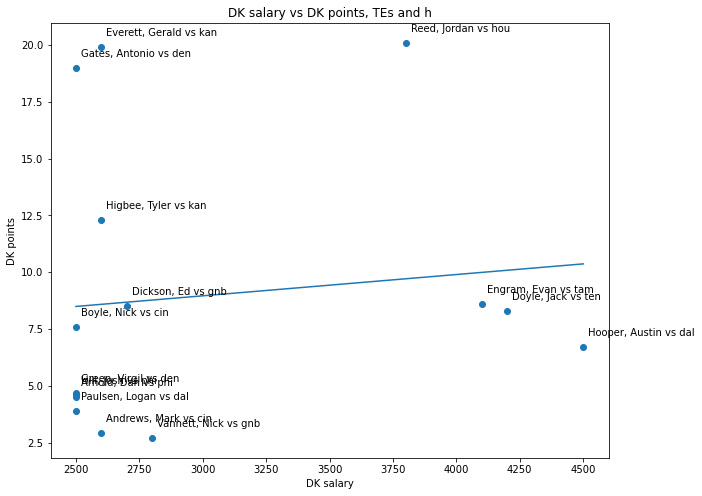

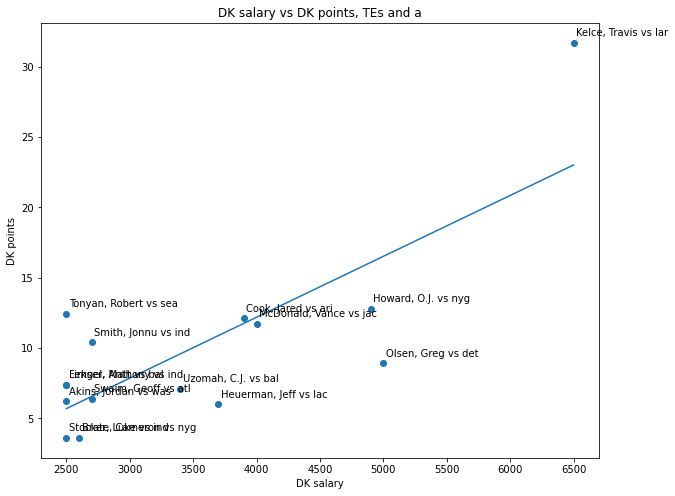

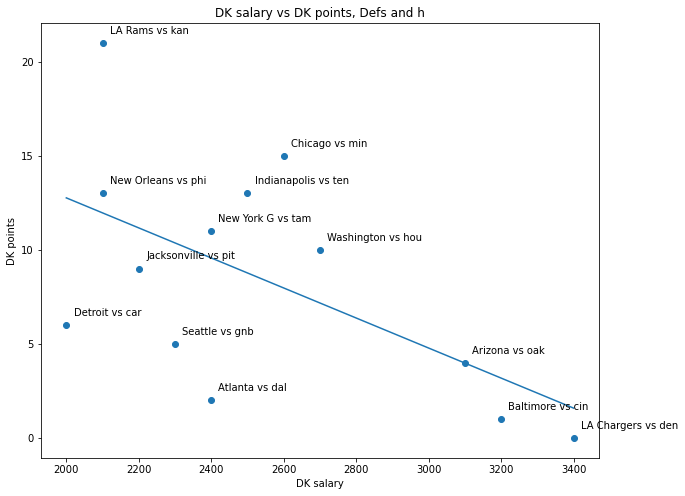

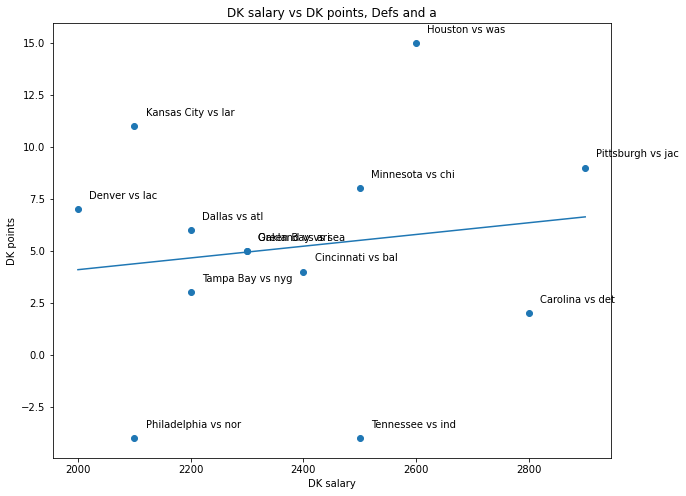

In [38]:
make_plots(dfs11, 'DK salary', 'DK points')

A lot to digest here, but the overall picture is that most of the trends hold from week to week. Players in home games tend to score higher (RBs in week 10 were an exception, and by a lot). Another interesting tidbit is that for Def, in week 11 and at home, the points scored were negatively correlated with salaries.

Something that stands out about defenses are the standard deviations are generally the same size as the means. I take that to mean that they are often wild cards, so that the best strategy is to choose a budget defense with a good matchup.

That seems to give us one of our first metrics: which Def have the best and worst matchups. For instance, if a defense is weak against the pass, it might be a good idea to pick up that QB, especially if he's in the middle for salary.

So that brings us to another stat we need to find:

- Def: Points allowed to RBs & WRs/QBs

which I think is easier to establish if we just append tables to each other and look at it that way. This metric, in theory, encapsulates all the other metrics mentioned earlier, like points per carry for RBs and points per reception for WRs, so I think this is probably the next best one to calculate.

In [39]:
# append all weeks for 2018
big_df = get_weekly_data(1,2018)
for x in range(2,17):
    df = get_weekly_data(x, 2018)
    big_df = big_df.append(df, ignore_index=True)
big_df_sorted = big_df.sort_values(by='DK points', ascending=False).reset_index(drop=True)
big_df_sorted['DK salary'] = big_df_sorted['DK salary'].fillna(0)
big_df_sorted['DK salary'].replace(0, 15000, inplace=True)
big_df_sorted['points/1k'] = np.array(big_df_sorted['DK points']) / np.array(big_df_sorted['DK salary']) * 1000
big_df_sorted = big_df_sorted.drop(['Unnamed: 0'], axis=1)
big_df_sorted.head(15)

,Week,Year,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k
0,14,2018,"Cooper, Amari",WR,dal,h,phi,52.70,6600.0,7.984848
1,12,2018,"McCaffrey, Christian",RB,car,h,sea,52.70,7900.0,6.670886
2,14,2018,"Henry, Derrick",RB,ten,h,jac,50.80,3600.0,14.111111
3,16,2018,"Brown, Antonio",WR,pit,a,nor,47.50,8300.0,5.722892
4,11,2018,"Hill, Tyreek",WR,kan,a,lar,46.50,8300.0,5.602410
5,4,2018,"Trubisky, Mitchell",QB,chi,h,tam,46.46,5200.0,8.934615
6,1,2018,"Kamara, Alvin",RB,nor,h,tam,46.10,8500.0,5.423529
7,16,2018,"Rodgers, Aaron",QB,gnb,a,nyj,45.88,6300.0,7.282540
8,1,2018,"Hill, Tyreek",WR,kan,a,lac,45.30,6500.0,6.969231
9,1,2018,"Fitzpatrick, Ryan",QB,tam,a,nor,45.28,5000.0,9.056000


In [40]:
len(big_df_sorted)

6369

In [41]:
# to see which def are giving up the most points, we'll add 2 columns: 20+ and 30+
# to get players that are scoring more than 20 and more than 30 points.
# then we'll count the highest occurrence for def in each category, for each position,
# which would give us favorable matchups
big_df_sorted['20+'] = np.where(big_df_sorted['DK points'] >= 20, 1, 0)
big_df_sorted['30+'] = np.where(big_df_sorted['DK points'] >= 30, 1, 0)
big_df_sorted.head()

,Week,Year,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k,20+,30+
0,14,2018,"Cooper, Amari",WR,dal,h,phi,52.7,6600.0,7.984848,1,1
1,12,2018,"McCaffrey, Christian",RB,car,h,sea,52.7,7900.0,6.670886,1,1
2,14,2018,"Henry, Derrick",RB,ten,h,jac,50.8,3600.0,14.111111,1,1
3,16,2018,"Brown, Antonio",WR,pit,a,nor,47.5,8300.0,5.722892,1,1
4,11,2018,"Hill, Tyreek",WR,kan,a,lar,46.5,8300.0,5.602410,1,1


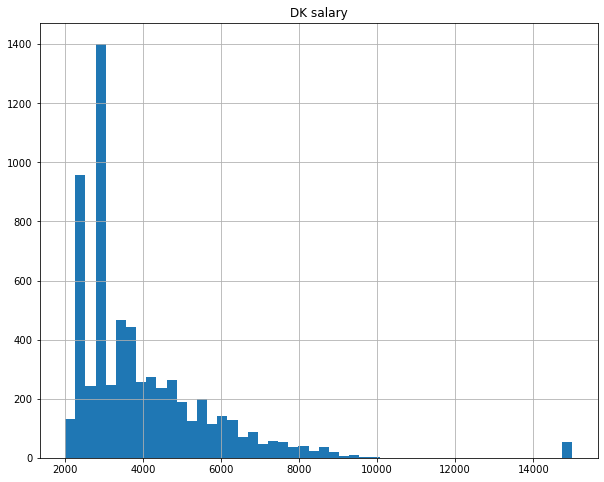

In [42]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
big_df_sorted.hist(bins=50, ax=ax, column='DK salary');

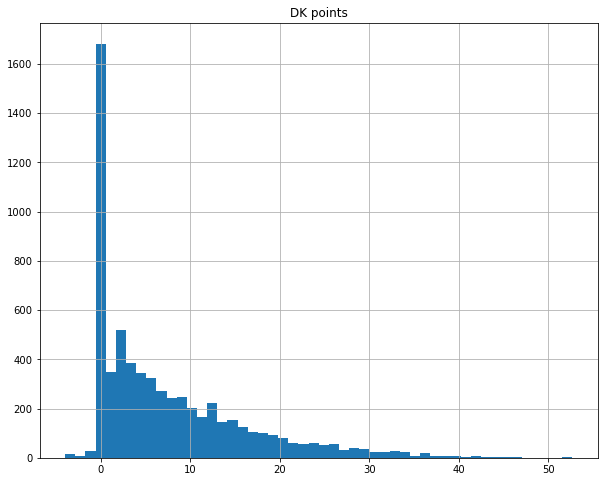

In [43]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
big_df_sorted.hist(bins=50, ax=ax, column='DK points');

In [44]:
twenty_plusers = big_df_sorted.loc[big_df_sorted['20+'] == 1].drop(['Week', 'Year', 'Team', 'DK points', 'DK salary', 'points/1k'], axis=1)
thirty_plusers = big_df_sorted.loc[big_df_sorted['30+'] == 1].drop(['Week', 'Year', 'Team', 'DK points', 'DK salary', 'points/1k'], axis=1)

In [45]:
twenty_plusers['Oppt'].value_counts()

tam    27
atl    27
kan    27
mia    26
nyj    26
cin    26
ari    24
car    24
nor    23
sfo    23
phi    22
cle    22
den    22
pit    21
sea    21
lar    20
hou    20
det    19
gnb    19
was    19
nyg    18
oak    18
ten    17
jac    15
lac    15
nwe    15
ind    15
buf    15
dal    13
min    11
bal    11
chi    11
Name: Oppt, dtype: int64

In [46]:
thirty_plusers['Oppt'].value_counts()

phi    14
tam    12
atl    11
lar     9
nor     9
gnb     8
nwe     8
det     8
cle     8
den     7
kan     7
mia     7
pit     6
ari     6
cin     6
nyg     6
was     5
oak     5
sea     5
lac     4
sfo     4
hou     4
chi     4
min     3
car     3
ind     3
dal     2
buf     2
jac     2
nyj     2
bal     1
ten     1
Name: Oppt, dtype: int64

So the def that will give up the most points to any position are Philadelphia, Tampa Bay, and Atlanta, followed by New Orleans and LA Rams. 

The Def that are the best to find on a budget are Baltimore, Tennessee, Buffalo, Chicago, Jacksonvlle, Minnesota, and Dallas.

In [47]:
phi_20p = twenty_plusers.loc[twenty_plusers['Oppt'] == 'phi']['Pos'].value_counts()
tam_20p = twenty_plusers.loc[twenty_plusers['Oppt'] == 'tam']['Pos'].value_counts()
atl_20p = twenty_plusers.loc[twenty_plusers['Oppt'] == 'atl']['Pos'].value_counts()
nor_20p = twenty_plusers.loc[twenty_plusers['Oppt'] == 'nor']['Pos'].value_counts()
lar_20p = twenty_plusers.loc[twenty_plusers['Oppt'] == 'lar']['Pos'].value_counts()

print('phi:')
print(phi_20p)
print('tam:')
print(tam_20p)
print('atl:')
print(atl_20p)
print('nor:')
print(nor_20p)
print('lar:')
print(lar_20p)

phi:
WR    9
QB    7
RB    6
Name: Pos, dtype: int64
tam:
WR    9
QB    8
RB    7
TE    3
Name: Pos, dtype: int64
atl:
RB    10
QB    10
WR     7
Name: Pos, dtype: int64
nor:
WR    12
QB     7
RB     4
Name: Pos, dtype: int64
lar:
WR     9
QB     5
TE     3
RB     2
Def    1
Name: Pos, dtype: int64


In [48]:
phi_30p = thirty_plusers.loc[twenty_plusers['Oppt'] == 'phi']['Pos'].value_counts()
tam_30p = thirty_plusers.loc[twenty_plusers['Oppt'] == 'tam']['Pos'].value_counts()
atl_30p = thirty_plusers.loc[twenty_plusers['Oppt'] == 'atl']['Pos'].value_counts()
nor_30p = thirty_plusers.loc[twenty_plusers['Oppt'] == 'nor']['Pos'].value_counts()
lar_30p = thirty_plusers.loc[twenty_plusers['Oppt'] == 'lar']['Pos'].value_counts()

print('phi:')
print(phi_30p)
print('tam:')
print(tam_30p)
print('atl:')
print(atl_30p)
print('nor:')
print(nor_30p)
print('lar:')
print(lar_30p)

phi:
QB    5
RB    5
WR    4
Name: Pos, dtype: int64
tam:
RB    6
QB    3
WR    3
Name: Pos, dtype: int64
atl:
RB    6
QB    3
WR    2
Name: Pos, dtype: int64
nor:
WR    5
QB    4
Name: Pos, dtype: int64
lar:
QB    3
WR    3
TE    2
RB    1
Name: Pos, dtype: int64


So what's going on here?

For the 20 plusers analysis, for example, NOR gave up 20+ pts to WR on 12 different occasions. So it makes great sense to choose WR who have them as an opponent. And in the 30 plusers analysis, TAM seems like a good team to choose RBs against.

And so now it looks like we have a heuristic for choosing positions:
    
    QB: playing PHI, TB, or ATL
    WR: NOR, LAR, or PHI
    RB: TAM, ATL, or PHI
    TE: LAR, or TAM
    Def: from further above... choose from Baltimore, Tennessee, Buffalo, Chicago, Jacksonvlle, Minnesota, and Dallas

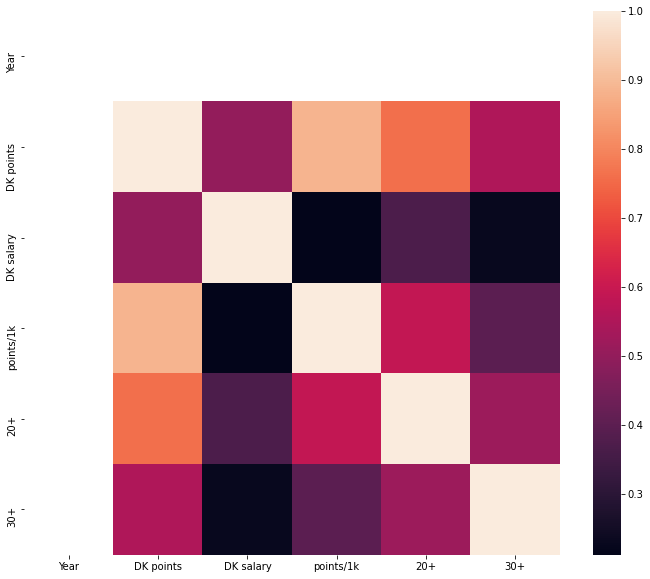

In [49]:
plt.subplots(figsize=(12,10))
sns.heatmap(big_df_sorted.drop('Week', axis=1).corr());

So taking a look at the heatmap, the best way to optimize for 20+ and 30+ point scoring players is to find a way to optimize points / 1k. That would mean we need to be looking out for budget players, or only taking expensive players if it's a pretty sure deal that they will produce a lot of points.

So how often do expensive players *actually* deliver the goods?

In [50]:
big_df_sorted = big_df_sorted.sort_values(by='DK salary', ascending=False).reset_index(drop=True)
expensive_players = big_df_sorted.loc[(big_df_sorted['DK salary'] < 15000)&(big_df_sorted['DK salary'] > 6000)]
len(expensive_players)

671

In [51]:
expensive_players.head(25)

,Week,Year,Name,Pos,Team,h/a,Oppt,DK points,DK salary,points/1k,20+,30+
53,6,2018,"Gurley, Todd",RB,lar,a,den,39.5,10000.0,3.950000,1,1
54,8,2018,"Gurley, Todd",RB,lar,h,gnb,36.5,9800.0,3.724490,1,1
55,7,2018,"Gurley, Todd",RB,lar,a,sfo,30.6,9800.0,3.122449,1,1
56,5,2018,"Kamara, Alvin",RB,nor,h,was,6.9,9600.0,0.718750,0,0
57,4,2018,"Kamara, Alvin",RB,nor,a,nyg,44.1,9600.0,4.593750,1,1
58,11,2018,"Gurley, Todd",RB,lar,h,kan,12.4,9600.0,1.291667,0,0
59,2,2018,"Kamara, Alvin",RB,nor,h,cle,17.9,9500.0,1.884211,0,0
60,15,2018,"Gurley, Todd",RB,lar,h,phi,34.4,9500.0,3.621053,1,1
61,3,2018,"Kamara, Alvin",RB,nor,a,atl,37.0,9500.0,3.894737,1,1
62,9,2018,"Gurley, Todd",RB,lar,a,nor,19.9,9500.0,2.094737,0,0


Out of the top 25 expensive players, 22 of them are RB. Interesting.

Draftkings has a salary cap of 50,000, and tournament winners usually score in the 180+ range of points. So, at a minimum, we would need to be averaging 3.5 per 1k of spend.

In [52]:
worthy_expensive_players = expensive_players.loc[expensive_players['points/1k']>3.5]
print(len(worthy_expensive_players))
len(worthy_expensive_players)/len(expensive_players)*100

188


28.017883755588674

In [53]:
# which position has the most occurences of 
# expensive players?
expensive_players['Pos'].value_counts()

WR    304
RB    187
QB    144
TE     36
Name: Pos, dtype: int64

In [54]:
# which position has the most occurences of 
# worthy expensive players?
worthy_expensive_players['Pos'].value_counts()

QB    65
WR    61
RB    54
TE     8
Name: Pos, dtype: int64

So across an entire season, with 671 instances of players costing more than $6,000, there were only 188 instances of those players actually paying off. So choosing an expensive player results in being correct about them only 28% of the time.

What's more, they are usually big name players, so they will be fairly common in the majority of lineups. 

This all indicates that expensive players are likely not good plays on a weekly basis.

That being said, some weeks because of the way defenses play out, a DFS player has to pick an expensive player at certain positions. This data says that if that's the case, it makes the most sense to do it at QB (\~45\% worthy of price tag) and RB (\~29\% worthy) but not at WR (\~20\%) or TE (\~22\%).

## Stacking

One other strategy that gets tossed around a lot, is called Stacking. Stacking involves using several players from the same team. The logic is that, if you have a QB that throws a lot to his favorite WR, using them both gets the benefit of them working together and scoring a bunch of points. I want to see how this holds up in the data.

In [55]:
big_df_sorted = big_df_sorted.sort_values(by='Week', ascending=True).reset_index(drop=True)
teams = list(big_df_sorted['Team'].unique())

In [68]:
# Given the DF just above, how do we
# want to decide what a good performance is?

# Generally, if a team does well as a whole,
# the players do well, too. Here, we can kind of 
# play around with how well the whole team does
# in relation to any single/stack of player/s on that team
team_high_score_threshold = 5 # set high if targeting high performing stacks
player_high_score_threshold = 29 # set according to game format (tournament vs 50/50)

count = 0
stacks = []
for i in range(1,17):
    week_df = big_df_sorted.loc[big_df_sorted['Week']==i]
    for team in teams:
        team_week_df = week_df.loc[week_df['Team']==team]
        if team_week_df['DK points'].sum() > team_high_score_threshold:
            team_week_df = team_week_df.drop(columns=['h/a', 'Oppt', 'points/1k', '20+', '30+'])
            stack = team_week_df.loc[team_week_df['DK points']>player_high_score_threshold]
            if len(stack) > 0:
                stacks.append(stack)
                count += 1
print(f'{count} / 544 ({round(count/544*100,2)}%) times where teams score more than \
{team_high_score_threshold} DFS points and at least one player scores more than \
{player_high_score_threshold} DFS points')

153 / 544 (28.12%) times where teams score more than 5 DFS points and at least one player scores more than 29 DFS points


In [69]:
# stack of 2 or more players

short_stacks = 0
good_stacks = 0
short_stacks_arr = []
good_stacks_arr = []
for stack in stacks:
    if (len(stack)) > 1:
        good_stacks += 1
        good_stacks_arr.append(stack)
    else:
        short_stacks += 1
        short_stacks_arr.append(stack)
print(f'{good_stacks} ({round(good_stacks/544*100,2)}% of total games) stacks where 2 or \
more players on the same team scores more than {player_high_score_threshold} points')
print(f'{short_stacks} ({round(short_stacks/544*100,2)}% of total games) times where just \
1 player scores more than {player_high_score_threshold} points')

43 (7.9% of total games) stacks where 2 or more players on the same team scores more than 29 points
110 (20.22% of total games) times where just 1 player scores more than 29 points


In [70]:
def get_stack_positions(stacks):
    counts = {'qb': 0,
             'rb': 0,
              'wr': 0,
              'te': 0,
              'def': 0
             }
    for stack in stacks:
        for row in range(len(stack)):
            if stack.iloc[row]['Pos'] == 'QB':
                counts['qb'] += 1
            elif stack.iloc[row]['Pos'] == 'RB':
                counts['rb'] += 1
            elif stack.iloc[row]['Pos'] == 'WR':
                counts['wr'] += 1
            elif stack.iloc[row]['Pos'] == 'TE':
                counts['te'] += 1
            elif stack.iloc[row]['Pos'] == 'Def':
                counts['def'] += 1
            else:
                pass
    return counts


In [71]:
counts = get_stack_positions(good_stacks_arr)
counts

{'qb': 38, 'rb': 15, 'wr': 35, 'te': 6, 'def': 1}

In [72]:
# stack of 3 or more players

short_stacks = 0
good_stacks = 0
short_stacks_arr = []
good_stacks_arr = []
for stack in stacks:
    if (len(stack)) > 2:
        good_stacks += 1
        good_stacks_arr.append(stack)
    else:
        short_stacks += 1
        short_stacks_arr.append(stack)
print(f'{good_stacks} ({round(good_stacks/544*100,2)}% of total games) stacks where 3 \
or more players on the same team scores more than {player_high_score_threshold} points')
print(f'{short_stacks} ({round(short_stacks/544*100,2)}% of total games) stacks where 2 \
or less players scores more than {player_high_score_threshold} points')

9 (1.65% of total games) stacks where 3 or more players on the same team scores more than 29 points
144 (26.47% of total games) stacks where 2 or less players scores more than 29 points


In [73]:
counts = get_stack_positions(good_stacks_arr)
counts

{'qb': 9, 'rb': 5, 'wr': 11, 'te': 2, 'def': 0}

With 272 games per year, and 2 teams per game, there's a total of 544 chances to see if a stack does well.

After playing with the data a bit, here are the respective patterns that I noticed, at least for the 2018 season:

- 28% / 8% / 2% of games have at least 1/2/3 player(s) that scores 29+ points
- 50% / 24% / 8% of games have at least 1/2/3 player(s) that scores 23+ points
- 72% / 52% / 29% have at least 1/2/3 player(s) that scores 17+ points
- For stacks, they work in formats where the scores can be lower, but drop off sharply where points need to be higher (tournaments).

*The significance of 17, 23, and 29: 17 is the minimum number of points each player must average in order to be competitive in the double-up and 50/50 formats, 23 is the average per player needed to do well in tournament style formats, and 29+ is the where you find players that make up for other picked players that don't do so well.*

## Conclusion

So the moral of the story currently is that we have at the minimum a couple of heuristics for choosing players:

1. Choose value players, i.e. players with moderate price tags but good matchups
2. Choose players based on Def they play
3. Avoid expensive players, since statistically they are unable to produce high scores consistently.
4. If you have to spend up, spend up at QB and RB, but not WR or TE.
5. Stacks work best in double-ups and 50/50s, but not so much in tournament plays.

With these guidelines, week 1 will be a total gamble, since we won't have any real data besides salaries. Week 2 will be the first time we can use any defensive data to help with our decision making.